In [1]:
import pandas as pd
# Load the datasets
taxi_data = pd.read_parquet("C:/Users/tejac/yellow_tripdata_2020-01 (1).parquet")
climate_data = pd.read_csv("C:/Users/tejac/export.csv")

In [2]:
print(taxi_data.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')


In [3]:
taxi_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,NaN
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,NaN
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,NaN
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,NaN
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,NaN


In [4]:
climate_data.head()

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2020-01-01,3.6,1.7,5.0,NaN,NaN,NaN,17.3,NaN,1008.2,NaN
1,2020-01-02,4.7,0.6,8.9,NaN,NaN,NaN,12.4,NaN,1013.9,NaN
2,2020-01-03,7.6,6.7,8.3,NaN,NaN,NaN,8.4,NaN,1010.2,NaN
3,2020-01-04,8.2,6.7,9.4,NaN,NaN,NaN,5.7,NaN,1003.7,NaN
4,2020-01-05,4.6,2.8,7.2,NaN,NaN,NaN,8.2,NaN,1010.1,NaN


In [5]:
# Convert 'tpep_pickup_datetime' to datetime and extract the date part
taxi_data['tpep_pickup_datetime'] = pd.to_datetime(taxi_data['tpep_pickup_datetime'])
taxi_data['date'] = taxi_data['tpep_pickup_datetime'].dt.date

# Convert 'date' in climate_data to date format
climate_data['date'] = pd.to_datetime(climate_data['date']).dt.date

# Preprocess and combine the datasets
merged_data  = pd.merge(taxi_data, climate_data, on='date')

In [6]:
# Date will not be helpful in predicting the trip duration.
merged_data.drop("date", axis=1,inplace=True)

In [7]:
merged_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1,...,3.6,1.7,5.0,NaN,NaN,NaN,17.3,NaN,1008.2,NaN
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1,...,3.6,1.7,5.0,NaN,NaN,NaN,17.3,NaN,1008.2,NaN
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1,...,3.6,1.7,5.0,NaN,NaN,NaN,17.3,NaN,1008.2,NaN
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1,...,3.6,1.7,5.0,NaN,NaN,NaN,17.3,NaN,1008.2,NaN
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2,...,3.6,1.7,5.0,NaN,NaN,NaN,17.3,NaN,1008.2,NaN


In [8]:
print(merged_data.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'tavg', 'tmin',
       'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt', 'pres', 'tsun'],
      dtype='object')


In [9]:
# Convert pickup and dropoff datetime columns to datetime objects
merged_data['tpep_pickup_datetime'] = pd.to_datetime(merged_data['tpep_pickup_datetime'])
merged_data['tpep_dropoff_datetime'] = pd.to_datetime(merged_data['tpep_dropoff_datetime'])

# Calculate trip duration in minutes
merged_data['trip_duration'] = (merged_data['tpep_dropoff_datetime'] - merged_data['tpep_pickup_datetime']).dt.total_seconds() / 60


In [10]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6404796 entries, 0 to 6404795
Data columns (total 30 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [11]:
# Check for null values in each column
na_values = merged_data.isna().sum()

# print the size of the dataframe
print(f'the sample size of the dataframe is: {merged_data.shape[0]}')
# Print the number of null values in each column
print(na_values)

the sample size of the dataframe is: 6404796
VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count            65441
trip_distance                  0
RatecodeID                 65441
store_and_fwd_flag         65441
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge       65441
airport_fee              6404796
tavg                      606228
tmin                      606228
tmax                      606228
prcp                     6404796
snow                     6404796
wdir                     6176595
wspd                      796014
wpgt                     6404796
pres                      796014
tsun                     640479

In [12]:
# Drop columns with null values count equal to the row count
merged_data.dropna(axis=1, how='all', inplace=True)

In [13]:
# Check for null values in each column
na_values = merged_data.isna().sum()

# print the size of the dataframe
print(f'the sample size of the dataframe is: {merged_data.shape[0]}')
# Print the number of na values in each column
print(na_values)

the sample size of the dataframe is: 6404796
VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count            65441
trip_distance                  0
RatecodeID                 65441
store_and_fwd_flag         65441
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge       65441
tavg                      606228
tmin                      606228
tmax                      606228
wdir                     6176595
wspd                      796014
pres                      796014
trip_duration                  0
dtype: int64


In [14]:
# dropping the meta data like ratecodeID and store_and_fwd_flag and wdir is dropped as it also has high missing values
merged_data.drop(['wdir','RatecodeID', 'store_and_fwd_flag'], axis=1, inplace=True)

In [15]:
# dropping the payment related featurtes as the time duration more dependent on the climatic condition and distance,
# the time amount is dependent on the time duration.
# To keep the model ligth and we run the model in the colab we are ignoring the payment related features as it is not impact or part of time duration.
merged_data.drop(['VendorID', 'payment_type','fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge'], axis=1, inplace=True)

In [16]:
merged_data.dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
PULocationID                      int64
DOLocationID                      int64
tavg                            float64
tmin                            float64
tmax                            float64
wspd                            float64
pres                            float64
trip_duration                   float64
dtype: object

In [17]:
# Check for null values in each column
na_values = merged_data.isna().sum()

# Print the number of na values in each column
print(na_values)

tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count           65441
trip_distance                 0
PULocationID                  0
DOLocationID                  0
tavg                     606228
tmin                     606228
tmax                     606228
wspd                     796014
pres                     796014
trip_duration                 0
dtype: int64


In [18]:
merged_data['passenger_count'].fillna(round(merged_data['passenger_count'].mean()), inplace=True)
# merged_data['congestion_surcharge'].fillna(round(merged_data['congestion_surcharge'].mean()), inplace=True)

C:\Users\tejac\AppData\Local\Temp\ipykernel_3556\4272943037.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['passenger_count'].fillna(round(merged_data['passenger_count'].mean()), inplace=True)


In [19]:
merged_data['tavg'].fillna(merged_data['tavg'].mean(), inplace=True)
merged_data['tmin'].fillna(merged_data['tmin'].mean(), inplace=True)
merged_data['tmax'].fillna(merged_data['tmax'].mean(), inplace=True)
merged_data['wspd'].fillna(merged_data['wspd'].mean(), inplace=True)
merged_data['pres'].fillna(merged_data['pres'].mean(), inplace=True)

C:\Users\tejac\AppData\Local\Temp\ipykernel_3556\2539506500.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['tavg'].fillna(merged_data['tavg'].mean(), inplace=True)
C:\Users\tejac\AppData\Local\Temp\ipykernel_3556\2539506500.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [20]:
# Check for null values in each column
na_values = merged_data.isna().sum()
# Print the number of na values in each column
print(na_values)

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
PULocationID             0
DOLocationID             0
tavg                     0
tmin                     0
tmax                     0
wspd                     0
pres                     0
trip_duration            0
dtype: int64


In [21]:
# Now you can use 'trip_duration' as your target variable
X = merged_data.drop(['trip_duration', 'tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1)
y = merged_data['trip_duration']

Step 2: Build Neural Network Models Split Data: Split the merged dataset into training and validation datasets in an 80%/20% ratio.

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#### Build Models: Build the following neural network models using TensorFlow:MLP (Multi-Layer Perceptron) Linear Regression (TF/Keras Sequential model with no hidden layers) DNN (Deep Neural Network with at least 2 hidden layers) python

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# MLP model
mlp_model = Sequential([
    Dense(3, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(2, activation='relu'),
    Dense(1)
])

# Linear Regression model
linear_model = Sequential([
    Dense(1, input_shape=(X_train.shape[1],))
])

# DNN model
dnn_model = Sequential([
    Dense(5, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(4, activation='relu'),
    Dense(3, activation='relu'),
    Dense(1)
])

C:\Users\tejac\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
mlp_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 3)                   │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:
linear_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 1)                   │              10 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10 (40.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 0 (0.00 B)

In [26]:
dnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 5)                   │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 3)                   │              15 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93 (372.00 B)

 Trainable params: 93 (372.00 B)

 Non-trainable params: 0 (0.00 B)

### Step 3: Compile and Fit ModelsCompile Models: Use Mean Square Error (MSE) and Mean Absolute Error (MAE) as loss functions and SGD, Adam, RMSProp as optimizers.

### MLP_Model

In [28]:
history = linear_model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

# AS discussed in the presentation  we could see that the validation loss is hitting the local minima at Epoch 22. So we will be taking epoch for 30 as a threshold for training the model
#So that we can visualize the training loss vs validation loss and select the best model . As the computation resoources is not sufficient the model is crashing while running with Epoch 100.


Epoch 1/100
160120/160120 ━━━━━━━━━━━━━━━━━━━━ 409s 3ms/step - loss: 78232.6172 - mae: 9.5034 - val_loss: 3907.2695 - val_mae: 12.6095
Epoch 2/100
160120/160120 ━━━━━━━━━━━━━━━━━━━━ 401s 2ms/step - loss: 70527.6406 - mae: 8.5836 - val_loss: 3880.6143 - val_mae: 6.9694
Epoch 3/100
160120/160120 ━━━━━━━━━━━━━━━━━━━━ 399s 2ms/step - loss: 13393.5098 - mae: 8.4610 - val_loss: 3866.9177 - val_mae: 7.5713
Epoch 4/100
160120/160120 ━━━━━━━━━━━━━━━━━━━━ 405s 3ms/step - loss: 48176.3398 - mae: 8.5154 - val_loss: 3868.6609 - val_mae: 7.3503
Epoch 5/100
160120/160120 ━━━━━━━━━━━━━━━━━━━━ 409s 3ms/step - loss: 61296.5352 - mae: 8.5625 - val_loss: 3866.5781 - val_mae: 8.2138
Epoch 6/100
160120/160120 ━━━━━━━━━━━━━━━━━━━━ 413s 3ms/step - loss: 53548.9961 - mae: 8.4734 - val_loss: 3878.8157 - val_mae: 7.0000
Epoch 7/100
160120/160120 ━━━━━━━━━━━━━━━━━━━━ 423s 3ms/step - loss: 131988.6406 - mae: 8.7977 - val_loss: 3870.4915 - val_mae: 9.0944
Epoch 8/100
160120/160120 ━━━━━━━━━━━━━━━━━━━━ 426s 3ms/step


KeyboardInterrupt



### Linear_regression

In [31]:
linear_model.compile(optimizer="adam", loss="mse", metrics=['mae'])

In [32]:
history = linear_model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
160120/160120 ━━━━━━━━━━━━━━━━━━━━ 271s 2ms/step - loss: 34208.7188 - mae: 8.4921 - val_loss: 3870.6458 - val_mae: 7.1561
Epoch 2/30
160120/160120 ━━━━━━━━━━━━━━━━━━━━ 264s 2ms/step - loss: 72662.3984 - mae: 8.6619 - val_loss: 3869.3721 - val_mae: 7.2416
Epoch 3/30
160120/160120 ━━━━━━━━━━━━━━━━━━━━ 319s 2ms/step - loss: 78545.8828 - mae: 8.6528 - val_loss: 3876.3491 - val_mae: 6.9700
Epoch 4/30
160120/160120 ━━━━━━━━━━━━━━━━━━━━ 266s 2ms/step - loss: 7678.7065 - mae: 8.4658 - val_loss: 3876.0598 - val_mae: 6.9730
Epoch 5/30
160120/160120 ━━━━━━━━━━━━━━━━━━━━ 323s 2ms/step - loss: 75036.7500 - mae: 8.6605 - val_loss: 3866.9514 - val_mae: 8.4257
Epoch 6/30
160120/160120 ━━━━━━━━━━━━━━━━━━━━ 321s 2ms/step - loss: 16835.7969 - mae: 8.4947 - val_loss: 3873.2532 - val_mae: 7.0816
Epoch 7/30
160120/160120 ━━━━━━━━━━━━━━━━━━━━ 326s 2ms/step - loss: 14987.3545 - mae: 8.5498 - val_loss: 3876.0229 - val_mae: 6.9877
Epoch 8/30
160120/160120 ━━━━━━━━━━━━━━━━━━━━ 325s 2ms/step - loss: 41

### DNN_Model

In [33]:
dnn_model.compile(optimizer="adam", loss="mse", metrics=['mae'])

In [34]:
history = dnn_model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
160120/160120 ━━━━━━━━━━━━━━━━━━━━ 328s 2ms/step - loss: 9646.6162 - mae: 9.0190 - val_loss: 3870.5327 - val_mae: 9.6869
Epoch 2/30
160120/160120 ━━━━━━━━━━━━━━━━━━━━ 320s 2ms/step - loss: 9407.1074 - mae: 7.9927 - val_loss: 3861.9148 - val_mae: 6.5067
Epoch 3/30
160120/160120 ━━━━━━━━━━━━━━━━━━━━ 360s 2ms/step - loss: 28497.5137 - mae: 7.7952 - val_loss: 3861.2905 - val_mae: 6.8574
Epoch 4/30
160120/160120 ━━━━━━━━━━━━━━━━━━━━ 348s 2ms/step - loss: 10009.4990 - mae: 7.7052 - val_loss: 3858.4741 - val_mae: 8.2092
Epoch 5/30
160120/160120 ━━━━━━━━━━━━━━━━━━━━ 319s 2ms/step - loss: 38512.6484 - mae: 7.8688 - val_loss: 3860.6108 - val_mae: 6.5475
Epoch 6/30
160120/160120 ━━━━━━━━━━━━━━━━━━━━ 325s 2ms/step - loss: 12657.4482 - mae: 7.6546 - val_loss: 3857.7952 - val_mae: 6.8949
Epoch 7/30
160120/160120 ━━━━━━━━━━━━━━━━━━━━ 384s 2ms/step - loss: 23224.4668 - mae: 7.7322 - val_loss: 3856.4844 - val_mae: 7.2873
Epoch 8/30
160120/160120 ━━━━━━━━━━━━━━━━━━━━ 330s 2ms/step - loss: 351

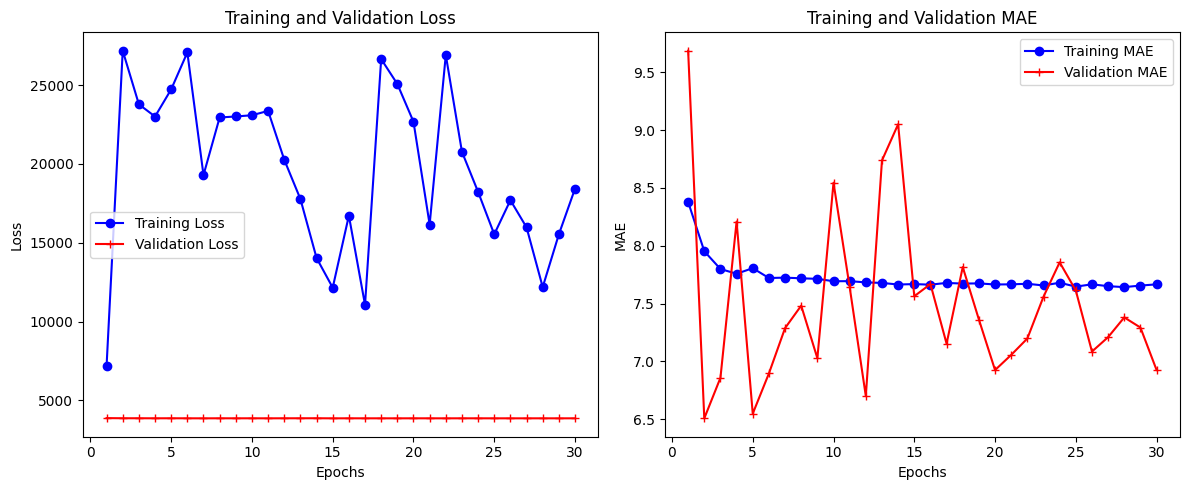

In [36]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']
epochs = range(1, 31)

# Plotting training and validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r+-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation MAE
plt.subplot(1, 2, 2)
plt.plot(epochs, mae, 'bo-', label='Training MAE')
plt.plot(epochs, val_mae, 'r+-', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

### Step 4: Evaluate and Select Best ModelCompare the three models based on their performance metrics and select the best one.Perform predictions using the best model and review the loss.

In [45]:
predictions = dnn_model.predict(X_test)

40030/40030 ━━━━━━━━━━━━━━━━━━━━ 62s 2ms/step


In [46]:
print('Predictions:', predictions)

Predictions: [[22.200508]
 [10.962074]
 [ 8.760266]
 ...
 [ 8.524801]
 [31.93785 ]
 [16.259851]]


In [53]:
import tensorflow as tf
# Compute the loss
loss = tf.keras.losses.mean_squared_error(y_test, predictions)
mean_loss = tf.reduce_mean(loss).numpy()

print(f"Mean Squared Error on Test Data: {mean_loss}")

Mean Squared Error on Test Data: 3857.818603515625
